### Run A resecuritization Deal

In [75]:
from absbox import API,EnginePath,Generic

localAPI = API(EnginePath.DEV,check=False)

Connecting engine server -> https://absbox.org/api/dev

✅Connected, local lib:0.26.4, server:0.27.10

#### What is a ReSec Deal ?

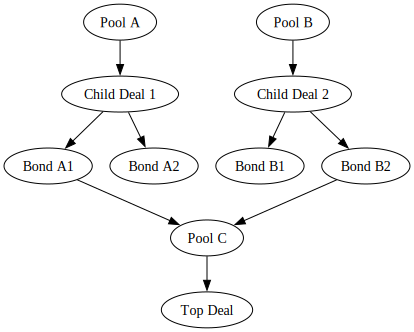

In [76]:
from graphviz import Digraph
# Create Digraph object
dot = Digraph()
dot.node('Top Deal')
dot.node('Child Deal 1')
dot.node('Bond A1')
dot.node('Bond A2')

dot.node("Pool A")
dot.node("Pool B")
dot.node("Pool C")

dot.edge("Pool B",'Child Deal 2')
dot.edge("Pool A",'Child Deal 1')
dot.edge("Pool C",'Top Deal')


dot.edge('Child Deal 1','Bond A1')
dot.edge('Child Deal 1','Bond A2')


dot.node('Child Deal 2')
dot.node('Bond B1')
dot.node('Bond B2')
dot.edge('Child Deal 2','Bond B1')
dot.edge('Child Deal 2','Bond B2')
# Add edge between 1 and 2
dot.edge('Bond A1',"Pool C")
dot.edge('Bond B2',"Pool C")
dot

In general , Resec deal has a pool of structured tranches, which cashflow comes from other deals.

##### Underlying Deal

The underlying deal has two tranches. The tranche "A1" was bought by "Top Deal".

In [77]:
test01 = Generic(
    "underlyingDeal"
       ,{"collect":["2022-11-01"   
                ,"2022-12-01"] 
        ,"pay":["2022-11-15"  
                ,"2022-12-15"] 
        ,"stated":"2030-01-01"
        ,"poolFreq":"MonthEnd"
        ,"payFreq":["DayOfMonth",20]
        }
    ,{'assets':[["Mortgage"
        ,{"originBalance":3600,"originRate":["fix",0.045],"originTerm":30
          ,"freq":"Monthly","type":"Level","originDate":"2021-02-01"}
          ,{"currentBalance":3600
          ,"currentRate":0.08
          ,"remainTerm":30
          ,"status":"current"}]]
     ,'issuanceStat':{"IssuanceBalance":2200}}
    ,(("acc01",{"balance":0}),)
    ,(("A1",{"balance":1000
             ,"rate":0.07
             ,"originBalance":1000
             ,"originRate":0.07
             ,"startDate":"2022-11-15"
             ,"rateType":{"Fixed":0.08}
             ,"bondType":{"Sequential":None}})
      ,("B",{"balance":1000
             ,"rate":0.0
             ,"originBalance":1000
             ,"originRate":0.07
             ,"startDate":"2022-11-15"
             ,"rateType":{"Fixed":0.00}
             ,"bondType":{"Equity":None}
             }))
    ,(("trusteeFee",{"type":{"fixFee":30}}),)
    ,{"amortizing":[
         ["payFee","acc01",['trusteeFee']]
         ,["accrueAndPayInt","acc01",["A1"]]
         ,["payPrin","acc01",["A1"]]
         ,["payPrin","acc01",["B"]]
         ,["payIntResidual","acc01","B"]
     ]}
    ,[["CollectedInterest","acc01"]
      ,["CollectedPrincipal","acc01"]
      ,["CollectedPrepayment","acc01"]
      ,["CollectedRecoveries","acc01"]]
    ,None
    ,None
    ,None
    ,None
    ,"Amortizing"
    )

##### Top Deal

The top deal bought 
* 100% of tranche A1
* bought at date "2022-03-31", which suggest , tranche cashflow after that date will attribute to Top Deal 

In [78]:
test02 = Generic(
    "TEST01"
    ,{"cutoff":"2021-03-01","closing":"2021-06-15","firstPay":"2021-07-26"
     ,"payFreq":["DayOfMonth",20],"poolFreq":"MonthEnd","stated":"2030-01-01"}
    ,{'deals':
       {("A1",'1 % 1',"2022-03-31"):test01}}
    ,(("acc01",{"balance":0}),)
    ,(("A1",{"balance":700
             ,"rate":0.07
             ,"originBalance":700
             ,"originRate":0.07
             ,"startDate":"2020-01-03"
             ,"rateType":{"Fixed":0.08}
             ,"bondType":{"Sequential":None}})
      ,("B",{"balance":700
             ,"rate":0.0
             ,"originBalance":700
             ,"originRate":0.07
             ,"startDate":"2020-01-03"
             ,"rateType":{"Fixed":0.00}
             ,"bondType":{"Equity":None}
             }))
    ,(("trusteeFee",{"type":{"fixFee":30}}),)
    ,{"amortizing":[
         ["payFee","acc01",['trusteeFee']]
         ,["accrueAndPayInt","acc01",["A1"]]
         ,["payPrin","acc01",["A1"]]
         ,["payPrin","acc01",["B"]]
         ,["payIntResidual","acc01","B"]
     ]}
    ,[["CollectedInterest","acc01"]
      ,["CollectedPrincipal","acc01"]]
    ,None
    ,None
    ,None
    ,None
    ,("PreClosing","Amortizing")
    )

#### Inspect Underlying Deal Cashflow

*Optional*

Let's run underlying deal first and get `A1` bond cashflow

In [79]:
r0 = localAPI.run(test01
                 ,poolAssump = None
                 ,runAssump = []
                 ,read=True)

r0['bonds']['A1']

Warning Message from server:
Bond B is not paid off

,balance,interest,principal,rate,cash,factor,memo
date,,,,,,,
2022-12-15,770.17,5.75,229.83,0.07,235.58,0.77017,"[<PayInt:A1>, <PayPrin:A1>]"
2022-12-20,770.17,0.00,0.00,0.07,0.00,0.77017,"[<PayInt:A1>, <PayPrin:A1>]"
2023-01-20,770.17,0.00,0.00,0.07,0.00,0.77017,"[<PayInt:A1>, <PayPrin:A1>]"
2023-02-20,647.30,9.92,122.87,0.07,132.79,0.64730,"[<PayInt:A1>, <PayPrin:A1>]"
2023-03-20,517.98,3.47,129.32,0.07,132.79,0.51798,"[<PayInt:A1>, <PayPrin:A1>]"
2023-04-20,388.25,3.07,129.73,0.07,132.80,0.38825,"[<PayInt:A1>, <PayPrin:A1>]"
2023-05-20,257.69,2.23,130.56,0.07,132.79,0.25769,"[<PayInt:A1>, <PayPrin:A1>]"
2023-06-20,126.43,1.53,131.26,0.07,132.79,0.12643,"[<PayInt:A1>, <PayPrin:A1>]"
2023-07-20,0.00,0.72,126.43,0.07,127.15,0.00000,"[<PayInt:A1>, <PayPrin:A1>]"


##### Note
User don't have to run underlying deal.
User just need to run the top deal the engine will run underlying deal automatically

Let's run the top deal with pool assumption tuple start with `ByDealName`

In [80]:
r = localAPI.run(test02
                 ,poolAssump = ("ByDealName"
                                ,{"underlyingDeal":(("Pool",("Mortgage",None,None,None,None)
                                               ,None,None)
                                             ,[]
                                             )})
                 ,runAssump = []
                 ,read=True)

Warning Message from server:
Bond B is not paid off

We can inspect the pool cashflow ( actually ,it is bond flow from underlying deal )

In [81]:
r['pool']['flow']['underlyingDeal', 'A1', '1 % 1'].loc["2022-11-30":,]

,Balance,Principal,Interest
Date,,,
2022-11-30,1000.00,0.00,0.00
2022-12-31,770.17,229.83,5.75
2023-01-31,770.17,0.00,0.00
2023-02-28,647.30,122.87,9.92
2023-03-31,517.98,129.32,3.47
2023-04-30,388.25,129.73,3.07
2023-05-31,257.69,130.56,2.23
2023-06-30,126.43,131.26,1.53
2023-07-31,0.00,126.43,0.72


#### Set with pool stress

User can set pool performance stress to underlying deal when runnning the top deal.


Here, we set underlying pool with `CPR 10%` with deal name `underlyingDeal`

In [83]:
poolPerf = ("Pool",("Mortgage",None,{"CPR":0.1},None,None)
                  ,None,None)

rStress = localAPI.run(test02
                     ,poolAssump = ("ByDealName"
                                    ,{"underlyingDeal":(poolPerf,[])
                                     })
                     ,runAssump = []
                     ,read=True)


rStress['bonds']['A1'].tail()

Warning Message from server:
Bond B is not paid off

,balance,interest,principal,rate,cash,factor,memo
date,,,,,,,
2023-04-20,384.31,2.94,111.22,0.07,114.16,0.549014,"[<PayInt:A1>, <PayPrin:A1>]"
2023-05-20,274.75,2.21,109.56,0.07,111.77,0.392500,"[<PayInt:A1>, <PayPrin:A1>]"
2023-06-20,165.97,1.63,108.78,0.07,110.41,0.237100,"[<PayInt:A1>, <PayPrin:A1>]"
2023-07-20,58.50,0.95,107.47,0.07,108.42,0.083571,"[<PayInt:A1>, <PayPrin:A1>]"
2023-08-20,0.00,0.34,58.50,0.07,58.84,0.000000,"[<PayInt:A1>, <PayPrin:A1>]"
